PROJECT 1: QUALITY OF RED WINE
- This dataset has been taken from the UCI Machine Learning Repository website.
- Both regression and classification methods can be applied to this problem. Here, I am implementing the classification model. I am working on the regression model separately.
- In this supervised machine learning problem, the dependent variable (quality) is a sensory variable measured by wine connoisseurs.
- The steps shown below were finalized after running a few iterations (e.g. different set of variables, different outlier cut-off points, etc).

In [143]:
# Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [144]:
# Loading the dataset 
red = pd.read_csv("winequality-red_undelimited.csv")

# Exploratory Data Analysis

In [145]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Observation: 
'quality' is the dependent variable in this project that has classes - 3, 4, 5, 6, 7 & 8. Since these are numeric values, this dependent variable is being taken as a continuous variable. We will separate it out in the future steps.

In [147]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [167]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observation:
    High standard deviations for many of the variables, especially free and total sulfur dioxide 

In [148]:
# Dropping the dependent variable column <== For EDA
red1 = red.drop(['quality'], axis = 1)

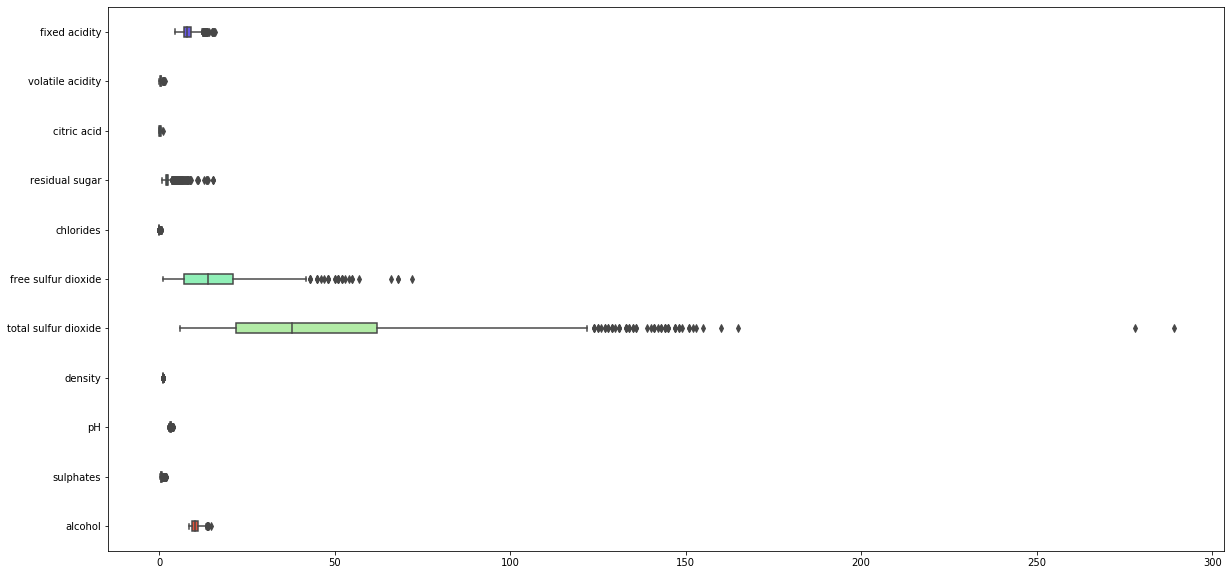

In [149]:
# Box plot of independent variables
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(data = red1, orient="h", palette="rainbow", width = 0.2)

Observation:
Figure above demonstrates the presence of a large number of outliers in the data.

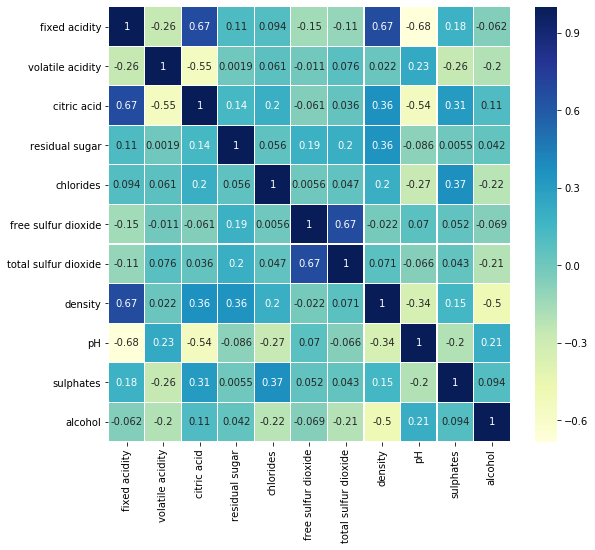

In [150]:
# Correlation Map (to see the correlation between the individual independent variables)
corrmat = red1.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 

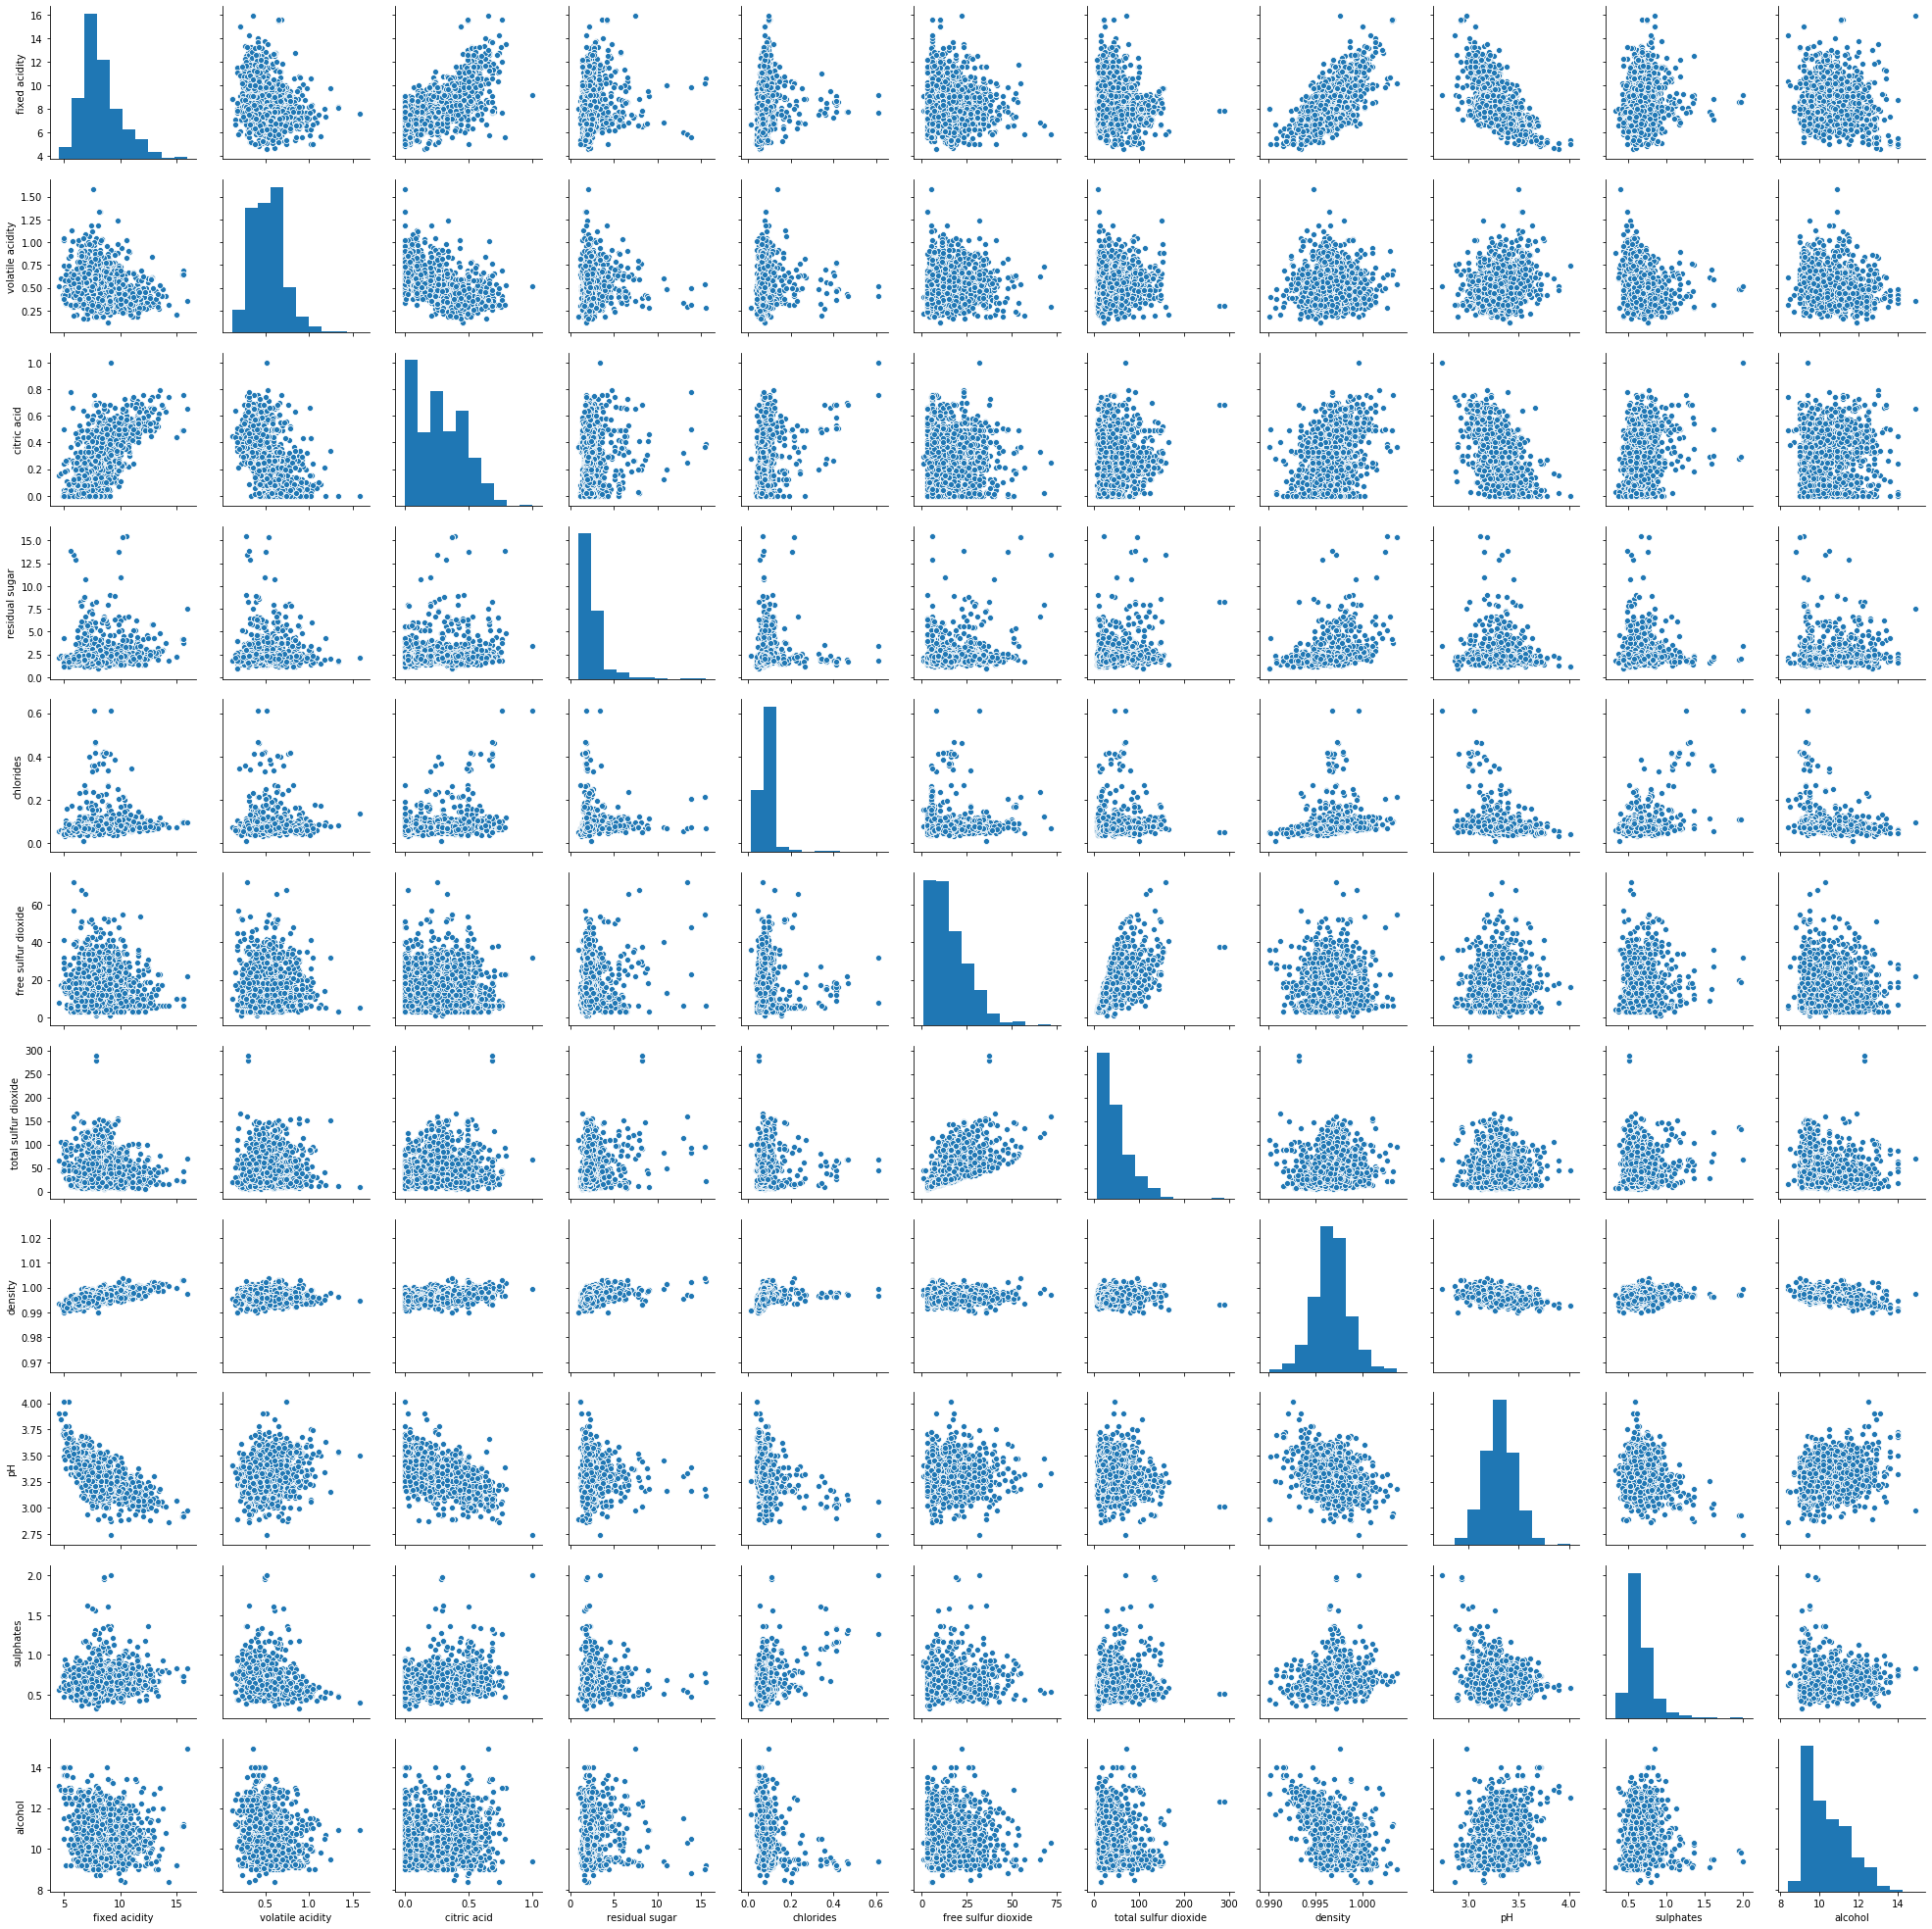

In [151]:
# Histograms and scatter plots between variables
sns.pairplot(red1)

Important observations from the above two figures:
- 'fixed acidity' and 'citric acid' have a relatively higher correlation. This makes sense since citric acid content in the wine contributes to the fixed acidity.
- Similarly, 'total sulfur dioxide' and 'free sulfur dioxide' have a strong correlation.
- Both 'fixed acidity' and 'citric acid' have inverse relation with 'pH' which is obvious. Higher the acidic content, lower the pH.
- Lets remove some of the redundant variables, viz., 'free sulfur dioxide', 'pH' & 'fixed acidity'.

# Outlier Detection & Removal

In [154]:
# Create a data frame with reduced number of columns for wrangling & cleaning
red2 = red.drop(['free sulfur dioxide', 'pH', 'fixed acidity', 'quality'], axis = 1)
red2.shape

(1599, 8)

In [155]:
red2.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')

In [156]:
# Inter Quartile Ranges
Q1 = red2.quantile (0.25)
Q3 = red2.quantile (0.75)
IQR = Q3 - Q1

b = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'Lower Bound' : (Q1 - 1.5 * IQR), 'Upper Bound' : (Q3 + 1.5 * IQR)}
red_IQR = pd.DataFrame(b)
red_IQR

,Q1,Q3,IQR,Lower Bound,Upper Bound
volatile acidity,0.3900,0.640000,0.250000,0.015000,1.015000
citric acid,0.0900,0.420000,0.330000,-0.405000,0.915000
residual sugar,1.9000,2.600000,0.700000,0.850000,3.650000
chlorides,0.0700,0.090000,0.020000,0.040000,0.120000
total sulfur dioxide,22.0000,62.000000,40.000000,-38.000000,122.000000
density,0.9956,0.997835,0.002235,0.992248,1.001187
sulphates,0.5500,0.730000,0.180000,0.280000,1.000000
alcohol,9.5000,11.100000,1.600000,7.100000,13.500000


In [158]:
# Create data frame of independent variables FREE OF OUTLIERS
red2 = red2[~((red2 < (Q1 - 1.5 * IQR)) | (red2 > (Q3 + 1.5 * IQR))).any(axis=1)]
red2.shape

(1256, 8)

In [159]:
# Combine to form a data frame consisting of independent & dependent variables
red_out = pd.concat([red2, red['quality']], axis = 1, join = 'inner')
red_out.shape

(1256, 9)

In [160]:
quality_comp = pd.DataFrame({'Initial' : (red['quality'].value_counts()), 'Final' : (red_out['quality'].value_counts())})
quality_comp

,Initial,Final
5,681,534
6,638,524
7,199,148
4,53,34
8,18,13
3,10,3


In [161]:
# Save File for further processing
red_out.to_csv('winequality-red_undelimited_cleaned.csv', index = False)
red_out.shape

(1256, 9)

# Machine Learning Model

In [168]:
# Load the dataset and create a matrix of independent variables and a dependent variable vector
red_clean = pd.read_csv("winequality-red_undelimited_cleaned.csv")
X = red_clean.iloc[:, :-1].values
y = red_clean.iloc[:, 8].values

In [169]:
red_clean.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,5
1,0.88,0.00,2.6,0.098,67.0,0.9968,0.68,9.8,5
2,0.76,0.04,2.3,0.092,54.0,0.9970,0.65,9.8,5
3,0.28,0.56,1.9,0.075,60.0,0.9980,0.58,9.8,6
4,0.70,0.00,1.9,0.076,34.0,0.9978,0.56,9.4,5


In [170]:
red_clean.describe()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,0.520195,0.254180,2.189570,0.078416,42.244427,0.996626,0.634920,10.381157,5.652070
std,0.164995,0.185928,0.442456,0.014309,26.104234,0.001674,0.117353,0.989578,0.770447
min,0.120000,0.000000,1.200000,0.041000,6.000000,0.992350,0.330000,8.400000,3.000000
25%,0.390000,0.087500,1.900000,0.070000,22.000000,0.995500,0.550000,9.500000,5.000000
50%,0.520000,0.240000,2.100000,0.078000,36.000000,0.996600,0.620000,10.100000,6.000000
75%,0.630000,0.400000,2.500000,0.087000,56.000000,0.997600,0.710000,11.000000,6.000000
max,1.005000,0.750000,3.600000,0.119000,122.000000,1.001000,0.980000,13.400000,8.000000


In [171]:
red_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 9 columns):
volatile acidity        1256 non-null float64
citric acid             1256 non-null float64
residual sugar          1256 non-null float64
chlorides               1256 non-null float64
total sulfur dioxide    1256 non-null float64
density                 1256 non-null float64
sulphates               1256 non-null float64
alcohol                 1256 non-null float64
quality                 1256 non-null int64
dtypes: float64(8), int64(1)
memory usage: 88.4 KB


In [172]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [173]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [177]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)

# Prediction of Test set
y_pred = classifier.predict(X_test)
y_pred

array([7, 5, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 5, 6, 5, 7, 5, 6, 7, 5, 6, 5,
       7, 6, 6, 5, 7, 5, 6, 5, 5, 5, 6, 5, 6, 7, 6, 7, 6, 6, 6, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 7, 5, 7, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5, 6,
       6, 6, 6, 6, 7, 5, 6, 6, 5, 7, 6, 6, 6, 6, 5, 7, 5, 5, 5, 6, 6, 6,
       6, 5, 7, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 7, 6, 7, 6, 5, 5, 6, 6, 6,
       5, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 7, 5, 7, 5, 5, 6, 5, 5, 6, 5,
       6, 7, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 7, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6,
       5, 6, 6, 6, 5, 7, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 7, 6,
       8, 7, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 6, 5, 6, 6, 5, 5, 6,
       6, 5, 6, 7, 5, 7, 5, 5, 6, 6], dtype=int64)

In [178]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix (y_test, y_pred)
cr = classification_report (y_test, y_pred)
cm

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  9,  3,  0,  0],
       [ 0,  0, 76, 18,  1,  0],
       [ 0,  0, 18, 87,  9,  0],
       [ 0,  0,  1,  6, 21,  0],
       [ 0,  0,  0,  0,  1,  1]], dtype=int64)

In [179]:
# Classification Report
cr

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        12\n           5       0.72      0.80      0.76        95\n           6       0.76      0.76      0.76       114\n           7       0.66      0.75      0.70        28\n           8       1.00      0.50      0.67         2\n\n    accuracy                           0.73       252\n   macro avg       0.52      0.47      0.48       252\nweighted avg       0.70      0.73      0.71       252\n'

In [180]:
# k-fold Cross Validation 'Mean Accuracy' & 'Standard Deviation'
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 6)
accuracies.mean()

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning:

The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.



0.6793007450692788

In [181]:
accuracies.std()

0.01984953434494187

In [186]:
# Kernel SVM Classifier & Training set
from sklearn.svm import SVC
ksc = SVC(C = 1, kernel = 'rbf')
ksc.fit (X_train, y_train)

# Prediction of Test set
y_pred_ksc = ksc.predict(X_test)

In [187]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix (y_test, y_pred_ksc)

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  8,  4,  0,  0],
       [ 0,  0, 71, 23,  1,  0],
       [ 0,  0, 32, 76,  6,  0],
       [ 0,  0,  1, 18,  9,  0],
       [ 0,  0,  0,  1,  1,  0]], dtype=int64)

In [197]:
# k-fold Cross Validation 'Mean Accuracy' & 'Standard Deviation'
from sklearn.model_selection import cross_val_score
accuracies_ksc = cross_val_score(estimator = ksc, X = X_train, y = y_train, cv = 6)
accuracies_ksc.mean()

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning:

The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

C:\A

0.5967560935579541

In [376]:
""""# Grid Search for Hyperparameter Tuning (to be used with Kernel SVM only)
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 0.5, 0.9]}
             ]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 7, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_accuracy"""

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=7.
  % (min_groups, self.n_splits)), Warning)


0.6538108356290174

In [315]:
""""best_parameters"""

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [182]:
# FEATURE IMPORTANCE
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

names = red_clean.columns.values

rfc = RandomForestClassifier()
rfc.fit(X, y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 11), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.160938268, 'alcohol'), (0.15070098423, 'sulphates'), (0.13009561729, 'density'), (0.12597886053, 'volatile acidity'), (0.1246851012, 'total sulfur dioxide'), (0.11751021645, 'chlorides'), (0.11268336977, 'citric acid'), (0.07740758255, 'residual sugar')]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [ ]:
"""
References:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

https://winefolly.com/review/wine-characteristics/
https://winefolly.com/review/sugar-in-wine-chart/
https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too